In [38]:
!pip install xgboost

     |████████████████████████████████| 1.7 MB 1.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import pickle
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import LinearSVR, SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

In [18]:
df = pd.read_csv('final_data.csv')
df.head()

,Dimensions,Blocks,Threads,Time,Speedup,[CUDA memcpy HtoD] Time cost,[CUDA memcpy HtoD] Avg cost,[CUDA memcpy HtoD] Min cost,[CUDA memcpy HtoD] Max cost,[CUDA memcpy DtoH] Time cost,[CUDA memcpy DtoH] Avg cost,[CUDA memcpy DtoH] Min cost,[CUDA memcpy DtoH] Max cost,cudaMalloc Time cost,cudaMalloc Avg cost,cudaMalloc Min cost,cudaMalloc Max cost,cudaMemcpy Time cost,cudaMemcpy Avg cost,cudaMemcpy Min cost,cudaMemcpy Max cost,cudaFree Time cost,cudaFree Avg cost,cudaFree Min cost,cudaFree Max cost,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
0,10,1,1,0.04,1.000000,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
1,10,1,2,0.04,1.000000,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
2,10,1,4,0.04,1.000000,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
3,10,1,8,0.03,1.333333,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
4,10,1,16,0.03,1.333333,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0


In [19]:
df = df.sample(frac=1).reset_index(drop=True)

In [20]:
df.columns

Index(['Dimensions', 'Blocks', 'Threads', 'Time', 'Speedup',
       '[CUDA memcpy HtoD] Time cost', '[CUDA memcpy HtoD] Avg cost',
       '[CUDA memcpy HtoD] Min cost', '[CUDA memcpy HtoD] Max cost',
       '[CUDA memcpy DtoH] Time cost', '[CUDA memcpy DtoH] Avg cost',
       '[CUDA memcpy DtoH] Min cost', '[CUDA memcpy DtoH] Max cost',
       'cudaMalloc Time cost', 'cudaMalloc Avg cost', 'cudaMalloc Min cost',
       'cudaMalloc Max cost', 'cudaMemcpy Time cost', 'cudaMemcpy Avg cost',
       'cudaMemcpy Min cost', 'cudaMemcpy Max cost', 'cudaFree Time cost',
       'cudaFree Avg cost', 'cudaFree Min cost', 'cudaFree Max cost',
       'Device Name', 'Compute Capability', 'Total Global Memory',
       'Shared Memory per Block', 'Registers per Block', 'Warp Size',
       'Maximum Threads per Block', 'Thread Dimension Z', 'Thread Dimension Y',
       'Thread Dimension X', 'Grid Size Z', 'Grid Size Y', 'Grid Size X',
       'Clock Rate', 'Total Constant Memory', 'Multiprocessor Count',
 

In [21]:
columns = ['Dimensions', 'Blocks', 'Threads', 'Time', 'Speedup',
       '[CUDA memcpy HtoD] Time cost', '[CUDA memcpy HtoD] Avg cost',
       '[CUDA memcpy HtoD] Min cost', '[CUDA memcpy HtoD] Max cost',
       '[CUDA memcpy DtoH] Time cost', '[CUDA memcpy DtoH] Avg cost',
       '[CUDA memcpy DtoH] Min cost', '[CUDA memcpy DtoH] Max cost',
       'cudaMalloc Time cost', 'cudaMalloc Avg cost', 'cudaMalloc Min cost',
       'cudaMalloc Max cost', 'cudaMemcpy Time cost', 'cudaMemcpy Avg cost',
       'cudaMemcpy Min cost', 'cudaMemcpy Max cost', 'cudaFree Time cost',
       'cudaFree Avg cost', 'cudaFree Min cost', 'cudaFree Max cost','Device Name', '+',
       'for', '-', '*', '/']

In [22]:
df = df[columns]

In [10]:
df

,Dimensions,Blocks,Threads,Time,Speedup,Device Name,[CUDA memcpy HtoD] Time,[CUDA memcpy HtoD] Avg,[CUDA memcpy HtoD] Min,[CUDA memcpy HtoD] Max,[CUDA memcpy DtoH] Time,[CUDA memcpy DtoH] Avg,[CUDA memcpy DtoH] Min,[CUDA memcpy DtoH] Max,cudaMalloc Time,cudaMalloc Avg,cudaMalloc Min,cudaMalloc Max,cudaMemcpy Time,cudaMemcpy Avg,cudaMemcpy Min,cudaMemcpy Max,cudaFree Time,cudaFree Avg,cudaFree Min,cudaFree Max,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
0,100,12,512,0.17,1.133333,NVIDIA GeForce RTX 2080 Ti,0.001814,0.604714,0.598175,0.614112,0.000615,0.614751,0.614751,0.614751,0.229760,76.586785,0.217658,229.315172,0.003828,0.957117,0.790004,1.434818,0.000717,0.239110,0.225932,0.264997,0,10,3,8,3,4,1,0,3,0
1,1000,6,128,0.11,0.733333,NVIDIA GeForce RTX 2080 Ti,0.001814,0.604714,0.598175,0.614112,0.000615,0.614751,0.614751,0.614751,0.229760,76.586785,0.217658,229.315172,0.003828,0.957117,0.790004,1.434818,0.000717,0.239110,0.225932,0.264997,0,10,3,8,3,4,1,0,3,0
2,768,12,6,0.17,1.307692,NVIDIA GeForce RTX 2080 Ti,0.001517,0.000506,0.000385,0.000613,0.001251,0.001251,0.001251,0.001251,0.011615,0.003872,0.000011,0.011594,0.002794,0.000698,0.000390,0.001266,0.000060,0.000020,0.000008,0.000031,0,0,3,8,3,0,0,0,0,0
3,10000,10,16,0.11,1.375000,NVIDIA GeForce GTX TITAN X,0.002846,0.000949,0.000939,0.000954,0.001219,0.001219,0.001219,0.001219,0.258798,0.086266,0.000202,0.258384,0.007014,0.001753,0.001247,0.003230,0.001063,0.000354,0.000283,0.000390,0,10,3,8,3,4,1,0,3,0
4,100000,2,32,0.11,0.733333,NVIDIA GeForce RTX 2080 Ti,0.001814,0.604714,0.598175,0.614112,0.000615,0.614751,0.614751,0.614751,0.229760,76.586785,0.217658,229.315172,0.003828,0.957117,0.790004,1.434818,0.000717,0.239110,0.225932,0.264997,0,10,3,8,3,4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025,6656,832,3,3.70,52.857143,NVIDIA GeForce GTX TITAN X,0.001706,0.000569,0.000492,0.000647,0.001644,0.001644,0.001644,0.001644,0.003826,0.001275,0.000022,0.003782,0.003383,0.000846,0.000501,0.001662,0.000200,0.000067,0.000007,0.000099,0,0,3,8,3,0,0,0,0,0
7026,1000,3,2,0.25,1.041667,NVIDIA TITAN V,0.002337,0.000779,0.000775,0.000786,0.002577,0.002577,0.002577,0.002577,0.333979,0.111326,0.000239,0.333499,0.008094,0.002023,0.000998,0.005065,0.000681,0.000227,0.000178,0.000320,0,10,3,8,3,4,1,0,3,0
7027,6912,216,5,0.68,4.250000,NVIDIA TITAN V,0.002690,0.000897,0.000799,0.000955,0.001613,0.001613,0.001613,0.001613,0.004714,0.001571,0.000009,0.004696,0.004332,0.001083,0.000807,0.001628,0.000019,0.000006,0.000005,0.000008,0,0,3,8,3,0,0,0,0,0
7028,100000,6,1,0.07,0.700000,NVIDIA GeForce GTX TITAN Black,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.001020,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,0,10,3,8,3,4,1,0,3,0


In [23]:
y = df['Speedup'].values
df.drop(['Speedup', 'Time'], axis = 1, inplace = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7040 entries, 0 to 7039
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Dimensions                    7040 non-null   int64  
 1   Blocks                        7040 non-null   int64  
 2   Threads                       7040 non-null   int64  
 3   [CUDA memcpy HtoD] Time cost  7040 non-null   float64
 4   [CUDA memcpy HtoD] Avg cost   7040 non-null   float64
 5   [CUDA memcpy HtoD] Min cost   7040 non-null   float64
 6   [CUDA memcpy HtoD] Max cost   7040 non-null   float64
 7   [CUDA memcpy DtoH] Time cost  7040 non-null   float64
 8   [CUDA memcpy DtoH] Avg cost   7040 non-null   float64
 9   [CUDA memcpy DtoH] Min cost   7040 non-null   float64
 10  [CUDA memcpy DtoH] Max cost   7040 non-null   float64
 11  cudaMalloc Time cost          7040 non-null   float64
 12  cudaMalloc Avg cost           7040 non-null   float64
 13  cud

In [25]:
df['Device Name'].unique().tolist()

['NVIDIA TITAN V',
 'NVIDIA GeForce GTX TITAN X',
 'NVIDIA GeForce GTX TITAN Z',
 'NVIDIA GeForce RTX 2080 Ti',
 'NVIDIA GeForce GTX TITAN Black']

In [26]:
oe = OrdinalEncoder()
gpus = oe.fit_transform(df['Device Name'].values.reshape(-1, 1))

In [27]:
df['Device Name'] = gpus

In [28]:
df.head()

,Dimensions,Blocks,Threads,[CUDA memcpy HtoD] Time cost,[CUDA memcpy HtoD] Avg cost,[CUDA memcpy HtoD] Min cost,[CUDA memcpy HtoD] Max cost,[CUDA memcpy DtoH] Time cost,[CUDA memcpy DtoH] Avg cost,[CUDA memcpy DtoH] Min cost,[CUDA memcpy DtoH] Max cost,cudaMalloc Time cost,cudaMalloc Avg cost,cudaMalloc Min cost,cudaMalloc Max cost,cudaMemcpy Time cost,cudaMemcpy Avg cost,cudaMemcpy Min cost,cudaMemcpy Max cost,cudaFree Time cost,cudaFree Avg cost,cudaFree Min cost,cudaFree Max cost,Device Name,+,for,-,*,/
0,10000,10,512,0.002337,0.000779,0.000775,0.000786,0.002577,0.002577,0.002577,0.002577,0.333979,0.111326,0.000239,0.333499,0.008094,0.002023,0.000998,0.005065,0.000681,0.000227,0.000178,0.000320,4.0,4,1,0,3,0
1,10000,9,512,0.002846,0.000949,0.000939,0.000954,0.001219,0.001219,0.001219,0.001219,0.258798,0.086266,0.000202,0.258384,0.007014,0.001753,0.001247,0.003230,0.001063,0.000354,0.000283,0.000390,1.0,4,1,0,3,0
2,10000,12,8,0.002337,0.000779,0.000775,0.000786,0.002577,0.002577,0.002577,0.002577,0.333979,0.111326,0.000239,0.333499,0.008094,0.002023,0.000998,0.005065,0.000681,0.000227,0.000178,0.000320,4.0,4,1,0,3,0
3,1000000,2,16,0.006557,0.002186,0.002182,0.002193,0.002117,0.002117,0.002117,0.002117,0.224750,0.074917,0.000215,0.224311,0.014055,0.003514,0.002920,0.005266,0.001290,0.000430,0.000265,0.000513,2.0,4,1,0,3,0
4,1000000,14,256,0.006557,0.002186,0.002182,0.002193,0.002117,0.002117,0.002117,0.002117,0.224750,0.074917,0.000215,0.224311,0.014055,0.003514,0.002920,0.005266,0.001290,0.000430,0.000265,0.000513,2.0,4,1,0,3,0


In [29]:
with open('utils/gpu_encoder.pickle', 'wb') as ge:
    pickle.dump(oe, ge)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

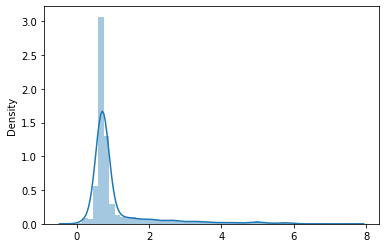

In [30]:
sns.distplot(np.log1p(y))

In [31]:
df.head()

,Dimensions,Blocks,Threads,[CUDA memcpy HtoD] Time cost,[CUDA memcpy HtoD] Avg cost,[CUDA memcpy HtoD] Min cost,[CUDA memcpy HtoD] Max cost,[CUDA memcpy DtoH] Time cost,[CUDA memcpy DtoH] Avg cost,[CUDA memcpy DtoH] Min cost,[CUDA memcpy DtoH] Max cost,cudaMalloc Time cost,cudaMalloc Avg cost,cudaMalloc Min cost,cudaMalloc Max cost,cudaMemcpy Time cost,cudaMemcpy Avg cost,cudaMemcpy Min cost,cudaMemcpy Max cost,cudaFree Time cost,cudaFree Avg cost,cudaFree Min cost,cudaFree Max cost,Device Name,+,for,-,*,/
0,10000,10,512,0.002337,0.000779,0.000775,0.000786,0.002577,0.002577,0.002577,0.002577,0.333979,0.111326,0.000239,0.333499,0.008094,0.002023,0.000998,0.005065,0.000681,0.000227,0.000178,0.000320,4.0,4,1,0,3,0
1,10000,9,512,0.002846,0.000949,0.000939,0.000954,0.001219,0.001219,0.001219,0.001219,0.258798,0.086266,0.000202,0.258384,0.007014,0.001753,0.001247,0.003230,0.001063,0.000354,0.000283,0.000390,1.0,4,1,0,3,0
2,10000,12,8,0.002337,0.000779,0.000775,0.000786,0.002577,0.002577,0.002577,0.002577,0.333979,0.111326,0.000239,0.333499,0.008094,0.002023,0.000998,0.005065,0.000681,0.000227,0.000178,0.000320,4.0,4,1,0,3,0
3,1000000,2,16,0.006557,0.002186,0.002182,0.002193,0.002117,0.002117,0.002117,0.002117,0.224750,0.074917,0.000215,0.224311,0.014055,0.003514,0.002920,0.005266,0.001290,0.000430,0.000265,0.000513,2.0,4,1,0,3,0
4,1000000,14,256,0.006557,0.002186,0.002182,0.002193,0.002117,0.002117,0.002117,0.002117,0.224750,0.074917,0.000215,0.224311,0.014055,0.003514,0.002920,0.005266,0.001290,0.000430,0.000265,0.000513,2.0,4,1,0,3,0


In [32]:
X = df.values

In [33]:
#sc = RobustScaler()
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.1, random_state = 42)

In [35]:
def evaluate_model(model, X_train, y_train, X_val, y_val, metric='R2'):
    model.fit(X_train, y_train)
    if metric == 'RMSE':
        y_pred_train = model.predict(X_train)
        print('Training RMSE score = {}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
        y_pred = model.predict(X_val)
        print('Validation RMSE score = {}'.format(np.sqrt(mean_squared_error(y_val, y_pred))))
    else:
        print('Training R2 score = {}'.format(model.score(X_train, y_train)))
        print('Validation R2 score = {}'.format(model.score(X_val, y_val)))

In [36]:
lr = LinearRegression()
evaluate_model(lr, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(lr, X_train, y_train, X_val, y_val, 'R2')

Training RMSE score = 34.72337592371929
Validation RMSE score = 32.02319938599638
Training R2 score = 0.21494996443113856
Validation R2 score = 0.30731408165950824


In [37]:
lasso = Lasso()
evaluate_model(lasso, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(lasso, X_train, y_train, X_val, y_val, 'R2')

Training RMSE score = 37.20634184578439
Validation RMSE score = 35.96709440899164
Training R2 score = 0.09866258902474934
Validation R2 score = 0.12618875385512318


In [38]:
ridge = Ridge()
evaluate_model(ridge, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(ridge, X_train, y_train, X_val, y_val, 'R2')

Training RMSE score = 34.95190444396386
Validation RMSE score = 32.59464071077022
Training R2 score = 0.204582499241606
Validation R2 score = 0.2823720973702628


In [39]:
svr = SVR()
evaluate_model(svr, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(svr, X_train, y_train, X_val, y_val, 'R2')

Training RMSE score = 38.63909823864803
Validation RMSE score = 37.87738038897485
Training R2 score = 0.027907890654040313
Validation R2 score = 0.030904022374857787


In [40]:
lsvr = LinearSVR()
evaluate_model(lsvr, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(lsvr, X_train, y_train, X_val, y_val, 'R2')

Training RMSE score = 38.65470866775354
Validation RMSE score = 37.90159400297415
Training R2 score = 0.027108091247807886
Validation R2 score = 0.02964711935519737


In [41]:
xgb = XGBRegressor(n_estimators = 150)
evaluate_model(xgb, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(xgb, X_train, y_train, X_val, y_val, 'R2')

Training RMSE score = 0.420973846925692
Validation RMSE score = 10.543773912156427
Training R2 score = 0.9998846111924076
Validation R2 score = 0.9249070631283384


In [42]:
mlp = MLPRegressor(hidden_layer_sizes=(320,5))
evaluate_model(mlp, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(mlp, X_train, y_train, X_val, y_val, 'R2')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training RMSE score = 31.673037580880823
Validation RMSE score = 27.63684635859122
Training R2 score = 0.3563639890445168
Validation R2 score = 0.49574299727501525


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [43]:
rfr = RandomForestRegressor(n_estimators = 200, max_depth = 15)
evaluate_model(rfr, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(rfr, X_train, y_train, X_val, y_val, 'R2')

Training RMSE score = 9.585285166649381
Validation RMSE score = 8.328116508972899
Training R2 score = 0.9393603517659362
Validation R2 score = 0.9539706861166246


In [38]:
rfe = RFE(rfr)
rfe = rfe.fit(X_train, y_train)
columns = [df.columns.tolist()[i] for i in range(len(df.columns.tolist())) if rfe.support_[i]]

In [37]:
columns

['Dimensions',
 'Blocks',
 'Threads',
 'Device Name',
 'Compute Capability',
 'Total Global Memory',
 'Clock Rate',
 'Multiprocessor Count',
 'Asynchronous Engine Count',
 'Memory Bus Width',
 'Memory Clock Rate',
 'L2 Cache Size',
 'Maximum Threads per Multiprocessor']

In [41]:
tdf = df[columns]

In [42]:
X_new = sc.fit_transform(tdf.values)

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X_new, y, test_size = 0.225, random_state = 42)

In [44]:
rfr = RandomForestRegressor(n_estimators = 250, max_depth = 15)
evaluate_model(rfr, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 61.53649095598264
Validation RMSE score = 55.97356119840434


In [45]:
xgb = XGBRegressor(n_estimators = 150)
evaluate_model(xgb, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 3.492558928076846
Validation RMSE score = 34.14312424451572


In [43]:
y_pred = xgb.predict(X_val)

In [44]:
y_pred[10]

1.4321225

In [45]:
y_val[10]

1.2

In [44]:
y_pred = rfr.predict(X_val)

In [45]:
y_pred[20]

1.026784205838013

In [46]:
y_val[20]

1.0

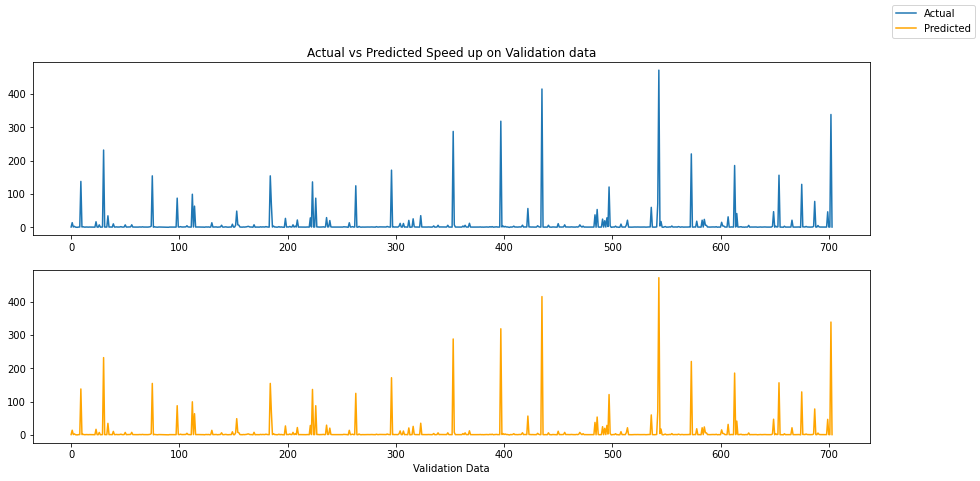

In [70]:
fig, axes = plt.subplots(2, 1, figsize = (15, 7))
axes[0].set_title('Actual vs Predicted Speed up on Validation data')
axes[0].plot(y_val, label = 'Actual')
axes[1].plot(y_val, label = 'Predicted', color = 'orange')
axes[1].set_xlabel('Validation Data')
fig.legend()
plt.savefig('validation_speedup_dynamic.pdf')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


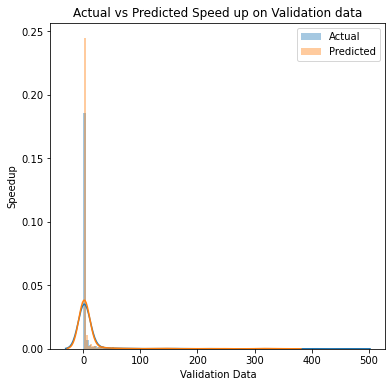

In [54]:
plt.figure(figsize = (6, 6))
sns.distplot(y_val, bins = 100, label = 'Actual')
sns.distplot(y_pred, bins = 100, label = 'Predicted')
plt.xlabel('Validation Data')
plt.ylabel('Speedup')
plt.title('Actual vs Predicted Speed up on Validation data')
plt.legend()